# Introduction
The aim of this project is to conduct a sentiment analysis using python and twitter's API. The topic in my case is Expo 2020.

**What is Expo 2020?**
> Initiated in London 1851. It is a global gathering aimed to find solutions to challenges imposed by the current times. Aims  to create enriching and immersive experience. World expo traverses through different cities each time. It also revolves around certain themes. Currently, World expo is taking place in Dubai, UAE. Between Oct, 2021 and Mar, 2022. For more information please visit [expo2020dubai](https://www.expo2020dubai.com/)

**The goal of this project**
> As discussed above the main goal is to conduct a sentiment analysis and learn the basics of data science and big data projects. Since expo 2020 is considered an educational exhibition that revolves around modern day problems and is hosted currently in the middle east. The aim is to measure the awareness of the arab society - *By arab society we mean anyone who posts their opinions in arabic*



This part is about discovering and collecting as much data as possible that is relating to the topic at hand. I will be needing tweets that are written in Arabic. 
Each step is further illustrated in its own markdown.





In [4]:
import tweepy
import pandas as pd
import numpy as np
import configparser
import matplotlib.pyplot as plt
import random

In [5]:
print(tweepy.__version__)


4.5.0


### 1. Configuration and Authentication 
---
This is the setup part and API authentication. Prior to using the API it is necessary to create a developer account, the account grants you two levels of access. A user level and an application/project level. I will be using **configparser** to ensure my API keys are not visible. I suggest you do the same. The following is how to set up the configuration process.


1.  create a project from the developer's portal
2.  generate your API and access keys
3.  save them in a 'config.ini' file in the following format:
   
    ``` ini
    [twitter]
    CONSUMER_KEY = 'YOUR CONSUMER KEY'
    CONSUMER_SECRET = 'YOUR CONSUMER SECRET'
    ACCESS_TOKEN = 'YOUR ACCESS TOKEN'
    ACCESS_TOKEN_SECRET = 'YOUR ACCESS TOKEN SECRET' 
    ```
   
4. install configparser by running  `pip install configparser`

> **Note:** If you don't plan on using the config parser make sure you remove the import and change the next cell accordingly. To eliminate any errors. Make sure you adhere to the same variable names!

In [6]:
# read the file from 'config.ini' 
config = configparser.ConfigParser()
config.read('config.ini')

# API Variables
CONSUMER_KEY = config['twitter']['CONSUMER_KEY']
CONSUMER_SECRET = config['twitter']['CONSUMER_SECRET']
ACCESS_TOKEN = config['twitter']['ACCESS_TOKEN']
ACCESS_TOKEN_SECRET = config['twitter']['ACCESS_TOKEN_SECRET']


In [7]:
# authenticate using tweepy
def twitter_setup():
    auth = tweepy.OAuth1UserHandler(CONSUMER_KEY, CONSUMER_SECRET)  # project access
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)  # user access

    api = tweepy.API(auth = auth)
    return api

extractor = twitter_setup() 

### 2. Data Collection
---
After setting up the credentials and authenticating the project. I can start extracting data using **tweepy's** API. The aim is to search different terms and different hashtags in order to collect as much entries as the API allows for. There are many limitations since I have the `Elevated Access`. The main ones is that the search API only allows search to go back 7 days. One way this was managed was starting the project early. However, the ideal goal is to be able to search the entire archive. Nonetheless, the project aims to measure the opinion at the current time. Therefore, the regular search will suffice!

I have created a function that when called extracts tweets depending on a local list. This list can have as many search queires as anyone would like. Also, The function parses the needed information and stores it in a data frame. Upon each iteration it appends to the previous data frame. This is beneficial when storing the data in .csv files.

In [8]:
def extract_tweets():
    tweets = []  # main data frame
    data = [] # temporary data frame
    columns_header = ['ID', 'Tweet', 'Timestamp', 'Likes', 'Retweets', 'Length']
    search_terms = ['@expo2020dubai -filter:retweets',
                    '#expo2020 -filter:retweets',
                    '#اكسبو -filter:retweets',
                    'اكسبو دبي -filter:retweets']  # search terms

    # fetch the tweets once prior to the iteration to append things correctly
    collected_tweets = tweepy.Cursor(extractor.search_tweets, q='expo dubai -filter:retweets', lang='ar', tweet_mode='extended').items(600)

    for tweet in collected_tweets:
        data.append([tweet.id, tweet.full_text, tweet.created_at,tweet.favorite_count, tweet.retweet_count, len(tweet.full_text)])

    tweets = pd.DataFrame(data=data, columns=columns_header) # store in original data frame

    for term in search_terms:
        data = []
        collected_tweets = tweepy.Cursor(extractor.search_tweets, q=term, lang='ar', tweet_mode='extended').items(600)

        for tweet in collected_tweets:
            data.append([tweet.id, tweet.full_text, tweet.created_at, tweet.favorite_count, tweet.retweet_count, len(tweet.full_text)])

        df = pd.DataFrame(data=data, columns=columns_header)
        frames = [tweets, df]  
        tweets = pd.concat(frames) # append the data frame to the previous one

    # since we are appending data frames the index value changes each time
    # here the goal is to create a new index that is incremented by one 
    tweets.insert(0, 'index', range(0, len(tweets))) 
    tweets = tweets.set_index('index')

    # random number to ensure files don't get overwritten
    tweets.to_csv(f'tweets{random.randint(127,1862)}.csv')
    
    return tweets

In [9]:
tweets = extract_tweets()

### 3. Preliminary Data Exploration

In [10]:
display(tweets.head())
display(tweets.tail())
print('total of collected tweets is ', len(tweets))

,ID,Tweet,Timestamp,Likes,Retweets,Length
index,,,,,,
0,1500939349889884166,أثناء زيارتها لـ #إكسبو2020 #دبي.. وزيرة نمساو...,2022-03-07 21:00:01+00:00,0,0,201
1,1500900614473138181,#RobertoCavalli #Uomo \n@roberto_cavalli \n\n*...,2022-03-07 18:26:06+00:00,0,0,199
2,1500770169651707904,هذو لي راك تهدر عليهم هم نفسهم الذين اردتم ان ...,2022-03-07 09:47:46+00:00,1,0,203
3,1500745009611657224,"تتوافق Shion مع عبارة ""لن أنساك. نقدم للزوار أ...",2022-03-07 08:07:47+00:00,1,0,285
4,1500730516831715328,جناح #أنجولا يحتفي مع جمهور #إكسبو2020 #دبي با...,2022-03-07 07:10:12+00:00,1,1,224


,ID,Tweet,Timestamp,Likes,Retweets,Length
index,,,,,,
1886,1500048479569207297,@zaydoun النجاح اللي حققه جناح الكويت في اكسبو...,2022-03-05 10:00:01+00:00,6,0,277
1887,1500047308750270464,"#إكسبو2020 #دبي يستضيف فعالية ""استثمر في #فلسط...",2022-03-05 09:55:22+00:00,1,2,117
1888,1500047187828477957,#القوات_المسلحة_الإماراتية تقدم عرضًا عسكريًا ...,2022-03-05 09:54:53+00:00,0,0,146
1889,1500046903177891842,ياليتني كنت معاكم امس في حفل ميحد حمد 💔\n#ميحد...,2022-03-05 09:53:45+00:00,2,1,90
1890,1500046581567205378,أنا من يومين عفست الدنيا وخربت جدول ويكند خوات...,2022-03-05 09:52:29+00:00,1,0,129


total of collected tweets is  1891


In [11]:

tweets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 1890
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   ID         1891 non-null   int64              
 1   Tweet      1891 non-null   object             
 2   Timestamp  1891 non-null   datetime64[ns, UTC]
 3   Likes      1891 non-null   int64              
 4   Retweets   1891 non-null   int64              
 5   Length     1891 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 103.4+ KB


### 4. Data Visualization

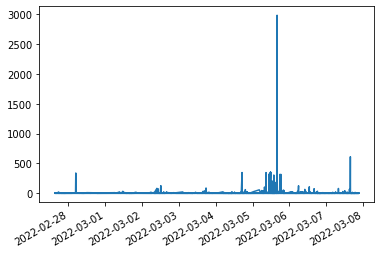

In [31]:
plt.plot(tweets['Timestamp'], tweets['Likes'])
plt.gcf().autofmt_xdate()
plt.show()

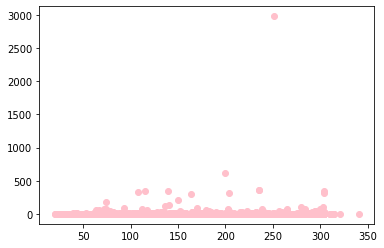

In [32]:
plt.scatter(tweets['Length'], tweets['Likes'], color='pink')
plt.show()
